## Desafío - Regresión desde la econometría
### Camila Vera Villa - Lunes 22 de julio

### Contexto
En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv Credit contiene las siguientes variables:

* Income : Ingreso anual disponible en miles de dólares.
* Limit : Límite del crédito.
* Rating : Ranking del crédito.
* Cards : Cantidad de tarjetas de credito.
* Age : Edad del usuario.
* Education : Años de educación del usuario.
* Gender : ¿Hombre o mujer?
* Student : ¿Es estudiante?
* Married : ¿Está casado?
* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance : Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el
promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de
distintos atributos.

### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels.
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.

Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable.
Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian.

** tip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [358]:
#elimina la primera columna del dataset
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1)
df.head(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [359]:
#Contar valores de variables
df['Ethnicity'].value_counts('%')

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [360]:
df['Gender'].value_counts('%')

Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

In [361]:
df['Student'].value_counts('%')

No     0.9
Yes    0.1
Name: Student, dtype: float64

In [362]:
df['Married'].value_counts('$')

Yes    0.6125
No     0.3875
Name: Married, dtype: float64

In [363]:
df['Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['AfricanAmerican'] = np.where(df['Ethnicity'] == 'AfricanAmerican', 1,0)
df['Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Single'] = np.where(df['Married'] == 'No', 1,0 )
df['Male'] = np.where(df['Gender'] == 'Male', 1, 0)

In [364]:
df.head(20)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,AfricanAmerican,Single,Male
0,14.891,3606,283,2,34,11,Male,0,Yes,Caucasian,333,0,0,0,0
1,106.025,6645,483,3,82,15,Female,1,Yes,Asian,903,1,0,0,0
2,104.593,7075,514,4,71,11,Male,0,No,Asian,580,1,0,1,0
3,148.924,9504,681,3,36,11,Female,0,No,Asian,964,1,0,1,0
4,55.882,4897,357,2,68,16,Male,0,Yes,Caucasian,331,0,0,0,0
5,80.180,8047,569,4,77,10,Male,0,No,Caucasian,1151,0,0,1,0
6,20.996,3388,259,2,37,12,Female,0,No,African American,203,0,0,1,0
7,71.408,7114,512,2,87,9,Male,0,No,Asian,872,1,0,1,0
8,15.125,3300,266,5,66,13,Female,0,No,Caucasian,279,0,0,1,0
9,71.061,6819,491,3,41,19,Female,1,Yes,African American,1350,0,0,0,0


### Desafío 2: Genere gráficos descriptivos para las variables continuas

Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.

* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [365]:
def plot_hist(dataframe, variable):
    
    #prints
    print(f'___________   {variable}   ___________')
    print(f' - La media de la variable {variable} es igual a: {dataframe[variable].mean()}')
    print(f' - La mediana de la variable {variable} es igual a: {dataframe[variable].median()}')
   
    #grafico
    plt.hist(dataframe[variable], alpha=.5, color='darkturquoise', label=variable)
    plt.axvline(dataframe[variable].mean(),lw = 3, color='tomato', label = 'Media')
    plt.axvline(dataframe[variable].median(),lw = 3, color ='gold', label = 'Mediana')
    
    plt.title(f' Histograma variable {variable}')
    plt.legend()
    plt.show       

___________   Balance   ___________
 - La media de la variable Balance es igual a: 520.015
 - La mediana de la variable Balance es igual a: 459.5


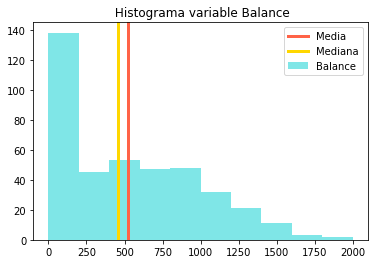

In [366]:
plot_hist(df, 'Balance')

* El comportamiento de la variable Balance esta desbalanceada hacia los valores iniciales, luego la distribucion va decayendo, las medias y las medianas  se concentran en torno al primer cuartil de la distribucion 

___________   Income   ___________
 - La media de la variable Income es igual a: 45.218885000000036
 - La mediana de la variable Income es igual a: 33.1155


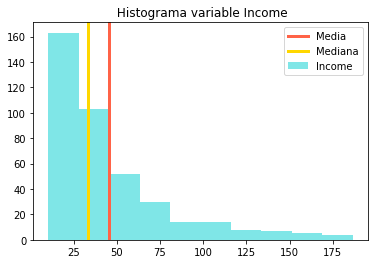

In [367]:
plot_hist(df, 'Income')

* El comportamiento de la variable Income está desbalanceada hacia los valores iniciales, luego la distribucion va decayendo muy abruptamente tras la media, las medias y las medianas  se concentran en torno al primer cuartil de la distribucion 

___________   Cards   ___________
 - La media de la variable Cards es igual a: 2.9575
 - La mediana de la variable Cards es igual a: 3.0


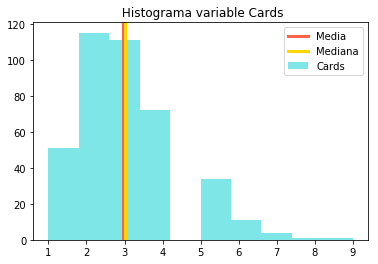

In [368]:
plot_hist(df, 'Cards')

* El comportamiento de la variable Cards esta desbalanceada hacia los valores iniciales y segmentada en dos grupos.Luego la distribucion va decayendo muy abruptamente tras la media y se interrumpe, las medias y las medianas  se concentran en torno al primer tercio de la distribucion 

___________   Rating   ___________
 - La media de la variable Rating es igual a: 354.94
 - La mediana de la variable Rating es igual a: 344.0


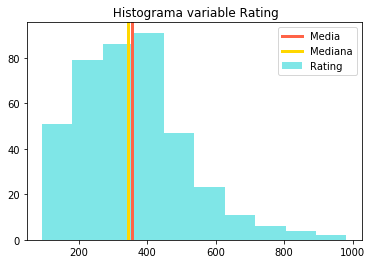

In [369]:
plot_hist(df, 'Rating')

* El comportamiento de la variable Rating esta desbalanceada hacia los valores iniciales, luego la distribucion decae abruptamente tras la media.  Las medias y las medianas  se concentran en torno al segundo quintil de la distribucion.

### Desafío 3: Regresión Lineal Simple

A continuación generaremos una serie de modelos simples:
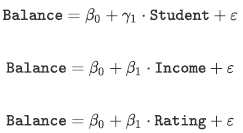

#### Utilizando statsmodels, comente brevemente los siguientes puntos:

* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
    * R: La variable Rating posee una mayor capacidad explicativa, ya que su R-squared de 0.746 es el mas alto entre las otras dos variables, asi tambien la probabilidad f es muy inferior al 0.05 (1.90e-120) por lo que nos sugiere que el modelo es estadisticamente significativo considerando una confianza del 95%.
* ¿Qué podemos decir sobre el comportamiento de Student?
    * R: La variable Student posee un P-valor cercano al 0%, por lo tanto es menor a 0.05, considerando una confianza del 95%, esto sugiere una mala correlacion con r cuadrado ajustado de 0.065, por lo que no hay correlacion con Balance. A su vez, el valor critico del coeficiente (t) nos indica que esta a aproximadamente 20 desviaciones estandar de la media, por lo que corresponde a un buen comportamiento siendo una variable significativa. 
* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?
    * R: La prueba de hipotesis con un valor muy inferior a 0.05, indica que existe una diferencia de medias para los valores de Balance entre los grupos de estudiantes y no estudiantes.

In [370]:
# modelo regresion lineal simple mediante Metodo Minimo de Cuadrados (OLS)
model_Balance_Student = smf.ols('Balance ~ Student', df).fit() 
model_Balance_Student.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        01:24:40   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
Student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [371]:
model_Balance_Income = smf.ols('Balance ~ Income', df).fit() 
model_Balance_Income.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        01:24:40   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
model_Balance_Rating = smf.ols('Balance ~ Rating', df).fit() 
model_Balance_Rating.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        01:24:40   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes

In [373]:
#calculo de medias y diferencia de medias

media_student = df.query('Student == 1')['Balance'].mean()
media_no_student = df.query('Student == 0')['Balance'].mean()

print("La media de Students es: ", media_student)
print("La media de No Students es: ", media_no_student)
                            
dif_med = media_student - media_no_student
print("La diferencia de medias entre estudiantes y no estudiantes es: ",dif_med)  

La media de Students es:  876.825
La media de No Students es:  480.36944444444447
La diferencia de medias entre estudiantes y no estudiantes es:  396.4555555555556


In [374]:
#prueba de hipotesis

prueba_hipotesis = stats.ttest_ind(df.query('Student ==1')['Balance'].dropna(),
                                   df.query('Student == 0')['Balance'].dropna())
prueba_hipotesis

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

### Desafío 4: Genere un modelo que incluya todos los regresores

Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [375]:
model_general = smf.ols('Balance ~ Student + Income + Rating + Limit + Cards + Age + Education + Gender + Married + Ethnicity + Asian + AfricanAmerican + Single + Male', df).fit() 
model_general.summary() 

C:\Users\camve\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\camve\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\camve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\camve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\camve\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        01:24:40   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -322.3165     23.736    -13.579      0.000    -368.984    -275.649
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Married[T.Yes]          -165.4252     13.138    -12.591      0.000    -191.256    -139.594
Ethnicity[T.Asian]         8.4021      7.060      1.190      0.235      -5.478      22.282
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Student                  425.7474     16.723     25.459      0.000     392.869     458.626
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
Asian                      8.4021      7.060      1.190      0.235      -5.478      22.282
AfricanAmerican                 0          0        nan        nan           0           0
Single                  -156.8913     12.759    -12.297      0.000    -181.976    -131.806
Male                            0          0        nan        nan           0           0
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Este modelo explica un 95 % de la varianza, lo que lo hace que tenga una gran fuerza predictiva (Adj. R-squared:	0.954), el r cuadrado ajustado, disminuye los efectos aditivos de añadir y combinar linealmente muchas variables al modelo, el f de probabilidad indica que el modelo es significativo estadisticamente. Los regresores en su mayoría salvo Education, son estadisticamente significativos.

### Desafío 5: Depure el modelo e incluya sólo los predictores significativos

En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia 
####  p-value <= 0.025

* Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

* ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [376]:
pvalues = model_general.pvalues
print ('Las siguientes variables son estadisticamente significativas: ')  

means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

df.columns



Las siguientes variables son estadisticamente significativas: 
Intercept          1.234676e-34
Married[T.Yes]     1.018673e-30
Student            8.854521e-85
Income            7.372312e-116
Rating             2.112213e-02
Limit              1.205974e-08
Cards              5.401200e-05
Single             1.422357e-29
dtype: float64


Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'Asian',
       'AfricanAmerican', 'Single', 'Male'],
      dtype='object')

In [377]:
#modelo con variables significativas estadisticamente

new_model_general = smf.ols('Balance ~ Single + Cards + Limit + Rating + Income + Student + Married',df).fit()
new_model_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1365.
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          1.31e-259
Time:                        01:24:40   Log-Likelihood:                -2402.7
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     393   BIC:                             4847.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -350.7776     13.176    -26.623      0.000    -376.681    -324.874
Married[T.Yes]  -178.2803      8.354    -21.340      0.000    -194.705    -161.855
Single          -172.4973      8.347    -20.667      0.000    -188.907    -156.088
Cards             17.6965      4.347      4.071      0.000       9.149      26.244
Limit              0.1926      0.033      5.889      0.000       0.128       0.257
Rating             1.1149      0.490      2.276      0.023       0.152       2.078
Income            -7.8731      0.232    -33.983      0.000      -8.329      -7.418
Student          426.0500     16.649     25.590      0.000     393.318     458.782
==============================================================================
Omnibus:                       30.722   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.850
Skew:                           0.727   Prob(JB):                     1.64e-08
Kurtosis:                       3.199   Cond. No.                     2.01e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Al depurar el modelo con variables estadísticamente significativas, los cambios son muy pequenos en el R cuadrado ajustado. Sin embargo se pueden inspeccionar las correlaciones parciales para la variable Balance y eliminar aquellas variables que tenga un valor de correlacion inferior a 0.4 para simplificar el modelo.

In [378]:
df.corr()['Balance']

Income             0.463656
Limit              0.861697
Rating             0.863625
Cards              0.086456
Age                0.001835
Education         -0.008062
Student            0.259018
Balance            1.000000
Asian             -0.009812
AfricanAmerican         NaN
Single             0.005673
Male                    NaN
Name: Balance, dtype: float64

In [379]:
df.corr()['Balance'] > 0.4

Income              True
Limit               True
Rating              True
Cards              False
Age                False
Education          False
Student            False
Balance             True
Asian              False
AfricanAmerican    False
Single             False
Male               False
Name: Balance, dtype: bool

Las variables con True, presentan un r mayor a .4 por lo que son mas explicativas. 
Con estas variables se probara el nuevo modelo:
* Income
* Limit
* Rating

In [380]:
#nuevo modelo general depurado con variables significativas

new_model_general_depurado = smf.ols('Balance ~ Income + Limit + Rating', df).fit()
new_model_general_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Fri, 26 Jul 2019   Prob (F-statistic):          3.20e-179
Time:                        01:24:40   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -489.7275     32.099    -15.257      0.000    -552.833    -426.622
Income        -7.7193      0.378    -20.418      0.000      -8.463      -6.976
Limit          0.0847      0.045      1.894      0.059      -0.003       0.173
Rating         2.6986      0.666      4.052      0.000       1.389       4.008
==============================================================================
Omnibus:                       95.253   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.312
Skew:                           1.373   Prob(JB):                     2.83e-37
Kurtosis:                       4.601   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comentario
* Al depurar el modelo con variables estadisticamente significativas y explicativas de la varianza sobre un r de 0.4, se obtiene un modelo con un r cuadrado ajustado de 0.875, cercano a 0.88, que es muy bueno estadisticamente.
A pesar de que es inferior al modelo anterior, es mucho más sencillo trabajar con 3 variables independientes que con las 13.

### Desafío 6:
Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes.

Principales regresores:
* Income
* Limit
* Rating

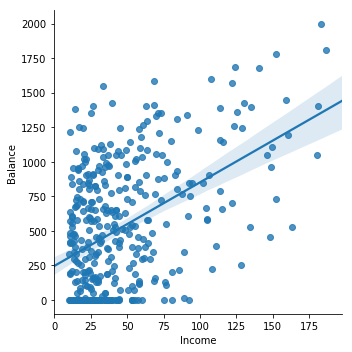

In [381]:
sns.lmplot('Income','Balance', df)

- Se observa una regresión lineal parcial y aparente entre Balance e Income, la varianza  es grande, y  se observan varios casos atipicos. Esto se relaciona con los valores de r cercanos a 0,46.

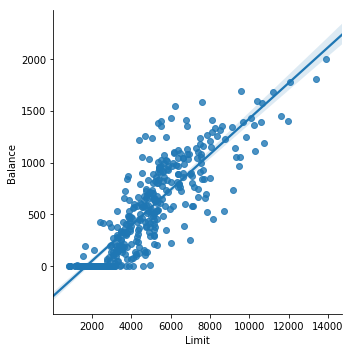

In [382]:
sns.lmplot('Limit', 'Balance', df)

- Se observa una correlacion lineal positiva  marcada entre Balance y Limit, la varianza no es tan grande. No se observan demasiados casos atípicos.

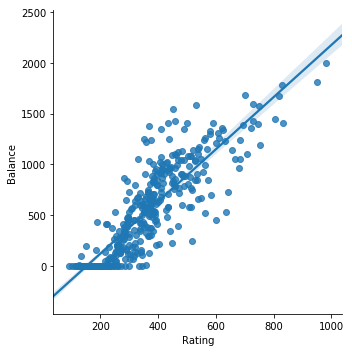

In [383]:
sns.lmplot('Rating', 'Balance', df)

- Se observa una correlacion lineal positiva  marcada entre Balance y Rating, la varianza no es tan grande. No se observa gran cantidad de casos atipicos.